In [73]:
# Import library
import cv2
import numpy as np
import requests
from PIL import Image


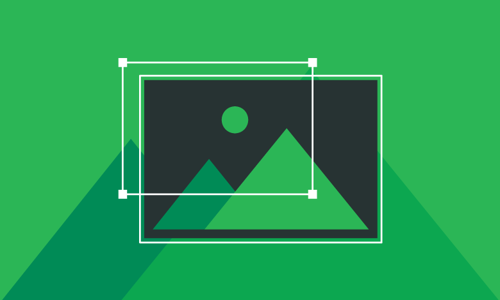

In [93]:
#reading image from url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png',stream= True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

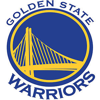

In [94]:
logo = Image.open('logo-warriors-2010.jpeg')
logo = logo.resize((100,100))
logo

In [95]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [96]:
# Get the center of the orihinal. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo
print(top_y)
print(bottom_y)

100
200


In [97]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
#roi = image_logow
l = cv2.resize(logo,(300,14))
print(roi.shape)
print(logo.shape)
# Add the logo to the ROI
result = cv2.addWeighted(roi, 1, logo, 1, 0)
#Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0,0,255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image,center_y),(0,0,255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

(100, 100, 3)
(100, 100, 3)


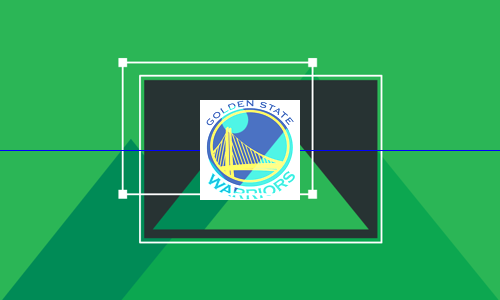

In [98]:
# Ploting logo watermark image
img =  Image.fromarray(image_logow, 'RGB') #convert array into RGB image
img

In [117]:
# Text watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Golden State Warriors', org=(w_image - 200, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, 
    color=(0,0,255), thickness=2, lineType= cv2.LINE_4);

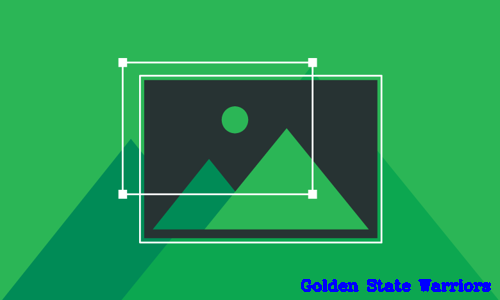

In [118]:
# Plotting text watermark image
timg = Image.fromarray(image_text)
timg